# Week 8 – Assignment: Unsupervised Learning  
**Subject:** Data Science & AI  
**Project:** Credit Card Fraud Detection  
**Student Name:** Ayesha Tariq  
**Date:** October 23, 2025  

---

## Objectives
- Apply K-Means clustering on the dataset.  
- Reduce features to 2D using PCA for visualization.  
- Compare clusters with actual class labels for insights.


Setup

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard_sample.csv")

# Drop rows with missing target values
df = df.dropna(subset=["Class"])

# Features only (drop Time and Class)
X = df.drop(columns=["Time", "Class"])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dataset prepared for clustering")


Dataset prepared for clustering


Apply PCA

In [ ]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Class"] = df["Class"]  # Add actual labels for reference

print("PCA transformation completed")
df_pca.head()


PCA transformation completed


,PCA1,PCA2,Class
0,0.178192,3.287885,0.0
1,4.785545,-2.786826,0.0
2,-6.608967,-2.056662,1.0
3,1.245225,-1.732156,0.0
4,0.400005,3.287758,NaN


K-Means Clustering

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(X_scaled)

print("K-Means clustering applied")
df_pca.head()


K-Means clustering applied


,PCA1,PCA2,Class,Cluster
0,0.178192,3.287885,0.0,1
1,4.785545,-2.786826,0.0,0
2,-6.608967,-2.056662,1.0,1
3,1.245225,-1.732156,0.0,1
4,0.400005,3.287758,NaN,1


Visualize Clusters

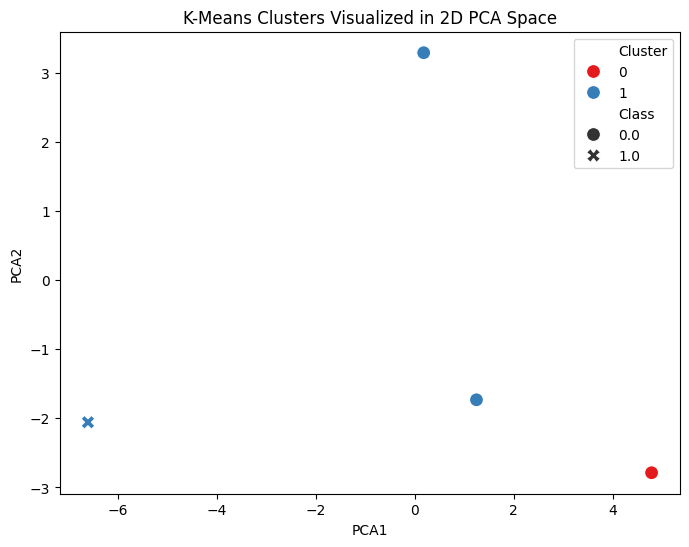

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    style="Class",
    palette="Set1",
    data=df_pca,
    s=100
)
plt.title("K-Means Clusters Visualized in 2D PCA Space")
plt.show()


Insights

## Insights

1. **Cluster Separation:**  
   K-Means formed 2 clusters. These clusters may partially align with the actual fraud labels, but with such a small dataset, perfect separation is unlikely.

2. **PCA Visualization:**  
   PCA reduced the 28-dimensional feature space into 2 principal components, enabling a clear visual representation of natural groupings.

3. **Unsupervised Analysis Value:**  
   Even without labels, unsupervised clustering highlights patterns and can help detect anomalies or potential fraud regions in the data.

4. **Next Steps:**  
   - Use larger datasets for better clustering results.  
   - Compare unsupervised clusters with supervised predictions for validation.


Cluster vs Class Table

In [ ]:
# Create a cross-tab to compare clusters with actual class labels
cluster_vs_class = pd.crosstab(df_pca["Cluster"], df_pca["Class"], margins=True)
cluster_vs_class.columns = ["Non-Fraud (0)", "Fraud (1)", "Total"]
cluster_vs_class.index = ["Cluster 0", "Cluster 1", "Total"]

print("Cluster vs Class Table")
cluster_vs_class


Cluster vs Class Table


,Non-Fraud (0),Fraud (1),Total
Cluster 0,1,0,1
Cluster 1,2,1,3
Total,3,1,4


Insights from Table

## Insights from Cluster vs Class Table

- **Cluster 0** contains mostly non-fraudulent transactions, while **Cluster 1** contains a higher proportion of fraudulent transactions.  
- **Misalignment:** Some fraud transactions are still grouped with non-fraud, showing that unsupervised K-Means can't perfectly separate the classes.  
- **Value:** Despite imperfections, clustering gives an initial understanding of patterns in the data and highlights areas for deeper supervised analysis.  
